 # Tanzanian Water Wells Project.

 # The Business Problem.

 - Tanzania has been facing problems with Water supply due to failure of Water pumps within their wells, I am tasked with creating a model that will predict water wells that require repair, end users being the goverment of Tanzania and any NGO's concerned.



# Data Collection

I will analyse Data provided from *DRIVEN DATA* 
(https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data),
sourced from Tanzanian Ministry of Water and supplied by Taarifa.

# Data Loading and Exploration

In [30]:
# Import relevant libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px


In [2]:

# Reading our csv Trainingset data values
Trainset = pd.read_csv('Trainingsetvalues.csv')
Trainset

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
Trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

 # EDA & Cleaning

In [4]:
# Carry out exploratory analysis and cleaning
# Prepare the data for modelling.
# Check columns to find any similaraties and relationship.

print(Trainset.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


In [5]:
# Verify and eliminate any duplicate columns in our DataFrame.
# drop duplicate waterpoint_type_group

Trainset.loc[Trainset['waterpoint_type'] != Trainset['waterpoint_type_group']]


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.000000,-2.000000e-08,Polisi,0,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
55,68724,20.0,2013-02-22,Muwsa,766,MUWSA,37.348169,-3.356538e+00,Environment,0,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,29915,600.0,2013-01-28,Isf,834,DWE,29.749577,-4.899134e+00,Shule Ya Msingi Muhamani,0,...,unknown,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe
59345,68576,600.0,2013-01-25,Isf,962,DWE,29.729909,-4.801508e+00,Tupendane,0,...,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe
59349,54026,0.0,2012-10-07,Dwsp,0,DWE,32.242568,-4.189353e+00,Kwa Mzee John Magube,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe
59356,34109,50.0,2013-02-05,Tasaf,-18,TASAF,40.218467,-1.033078e+01,Kwa Mzee Licholonjo,0,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [6]:
# drop quantity_group

Trainset.loc[Trainset['quantity'] != Trainset['quantity_group']]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group


In [7]:
# drop payment_type

Trainset.loc[Trainset['payment'] != Trainset['payment_type']] 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
11,50409,200.0,2013-02-18,Danida,1062,DANIDA,35.770258,-10.574175,Kwa Alid Nchimbi,0,...,on failure,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
13,50495,0.0,2013-03-15,Lawatefuka Water Supply,1368,Lawatefuka water sup,37.092574,-3.181783,Kwa John Izack Mmari,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [8]:
# drop extraction_type_group

Trainset.loc[Trainset['extraction_type'] != Trainset['extraction_type_group']]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
31,6696,50.0,2011-03-16,Private Individual,180,WU,38.363555,-6.636104,Kituo Cha Maziwa,0,...,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
45,12958,0.0,2012-10-22,World Vision,0,World Vision,33.345260,-3.838998,Shimasa,0,...,on failure,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
66,34255,0.0,2011-02-22,Piusi,1788,SHIPO,34.897257,-9.203522,Kwa Piusi,0,...,never pay,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
88,27312,50.0,2011-03-12,Private Individual,159,WU,38.353567,-6.638696,Kessy,0,...,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
92,39920,200.0,2011-03-23,Danida,18,DA,38.890402,-6.557903,Gedebu,0,...,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,45357,0.0,2013-12-02,Sangea District Council,847,Sangea District Coun,35.798121,-10.725160,Kwa Inglibeth,0,...,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump
59309,50703,50.0,2013-01-22,Makonde,465,Makonde,39.423152,-10.873742,Mwinyi,0,...,per bucket,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
59325,52830,50.0,2011-03-16,Private Individual,182,WU,38.373661,-6.638756,Ballongo,0,...,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59354,16666,0.0,2011-07-26,Md,0,DW,31.547474,-1.798378,Kwenye Chama Ch,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [9]:
# drop source_type

Trainset.loc[(Trainset['source_type'] == 'borehole') & (Trainset['source'] != 'machine dbh')]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
66,34255,0.0,2011-02-22,Piusi,1788,SHIPO,34.897257,-9.203522,Kwa Piusi,0,...,never pay,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
107,60371,0.0,2011-07-21,Hesawa,0,HESAWA,31.767301,-3.025106,Maendeleo,0,...,other,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
147,66521,2000.0,2011-02-03,Shipo,1603,Shipo,34.988871,-8.911325,none,0,...,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
160,13815,1000.0,2011-03-03,Kkkt,1562,Villagers,34.945465,-8.868660,Kwa Robart Mchena,0,...,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
202,8060,500.0,2011-02-22,Shipo,1768,SHIPO,34.899308,-9.204511,Kwa Bonifasi Pascal,0,...,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58959,3894,0.0,2011-08-12,Rudep,811,DWE,31.552397,-7.666432,Kwa Charles,0,...,never pay,soft,good,enough,enough,hand dtw,borehole,groundwater,other,other
58981,41505,1000.0,2011-02-22,Danida,1881,DWE,35.497390,-8.346554,none,0,...,annually,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
59191,42641,500.0,2011-09-03,Kkkt,1598,Villagers,34.896096,-8.902061,Kwa Feda Mbago,0,...,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
59283,55727,0.0,2011-03-14,Danida,1905,DWE,35.136409,-8.370713,none,0,...,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump


# Data Preparation and Preprocessing

In [10]:
# Drop duplicates & any columns that do not carry any useful information
# Note that: most columns are duplicate of the others only that  

Trainset = Trainset.drop(columns= ['waterpoint_type_group',
                       'quantity_group', 
                       'payment_type',
                       'extraction_type_group',
                       'source_type'])

# Nulls

In [11]:
#  Identify Nulls
#  Handle null values
Trainsetnulls = [col for col in Trainset.columns if Trainset[col].isna().any()]
for col in Trainsetnulls:
    Trainset[col].fillna(Trainset[col].mode().iloc[0], inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9324\3996293064.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Trainset[col].fillna(Trainset[col].mode().iloc[0], inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9324\3996293064.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Trainset[col].fillna(Trains

# Reading into the Labels file

In [12]:
# Read into the TrainingSetlabels, contains the id & status of the pump
# Display results.

Functionality = pd.read_csv('Trainingsetlabels.csv')
Functionality

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [13]:
# Check what multiple values are within the status_group  
# N.B : DO NOT bother with 'id' as it is numerical
# Check for any null values

Functionality['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [14]:
Functionality.isnull().sum()

id              0
status_group    0
dtype: int64

There are steps to follow before we can begin modelling our cleaned data, these are:

-  Splitting the data to Train,Test
-  Use OneHotEncoders 
-  Convert categorical values to Binary

In [15]:
# Assign the main variables  for our files  to X(train, test),Y(train,test)

X = Trainset
y = Functionality['status_group']

# Encoding

In [16]:
# Convert to binary format

Functionality_binary = {'functional': 1, 'functional needs repair': 0, 'non functional': 0}
Functionality['status_group'] = Functionality['status_group'].map(Functionality_binary)
Functionality['status_group']

0        1
1        1
2        1
3        0
4        1
        ..
59395    1
59396    1
59397    1
59398    1
59399    1
Name: status_group, Length: 59400, dtype: int64

# Train test

In [17]:
# split into a holdout set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=57, test_size = 0.2, stratify=y)
# second split creates validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=57, test_size = 0.2, stratify=y_train)

y_train = y_train.replace(Functionality_binary)
y_test = y_test.map(Functionality_binary)
y_val = y_val.replace(Functionality_binary)

C:\Users\HP\AppData\Local\Temp\ipykernel_9324\1224101929.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(Functionality_binary)
C:\Users\HP\AppData\Local\Temp\ipykernel_9324\1224101929.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_val = y_val.replace(Functionality_binary)


# ColumnTransformer and Pipeline 

In [18]:
# Convert all categorical to Binary for simplicity

num_col = [c for c in X.columns if X[c].dtype in ['float64', 'int64']]
ohe_col = [c for c in X.columns if X[c].nunique() < 3 and X[c].dtype not in ['float64', 'int64']]
freq_col = [c for c in X.columns if X[c].nunique() >= 3 and X[c].dtype not in ['float64', 'int64']]
# Print the results

print(f'Numeric columns: {num_col}\n')
print(f'OneHotEncoded columns: {ohe_col}\n') 
print(f'Frequecy columns: {freq_col}\n')

# Set up a pipiline to work this process. 

categorical_imputer = SimpleImputer(strategy='constant', fill_value=0)
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Define the pipeline for categorical features

categorical_pipeline = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('encoder', onehot_encoder)
])

# Define the pipeline for Frequency encoded features

frequency_pipeline = Pipeline(steps=[
    ('freq_encoder', ce.CountEncoder(normalize=True, min_group_size= .15)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
])

# Define the pipeline for numerical features

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine the transformers into a preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, ohe_col),
        ('num', numerical_pipeline, num_col),
        ('freq', frequency_pipeline, freq_col)
    ]
)
# fit preprocessor to X_train.

preprocessor.fit(X_train)

Numeric columns: ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']

OneHotEncoded columns: ['public_meeting', 'recorded_by', 'permit']

Frequecy columns: ['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_class', 'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 'source', 'source_class', 'waterpoint_type']



ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['public_meeting', 'recorded_by', 'permit']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['id', 'amount_tsh', 'gps_height', 'longitude',
                                  'latitude', 'num_private', 'region_code',
                                  'di...
                                                 ('freq_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['date_recorded', 'funder', 'installer',
                                  'wpt_name', 'basin', 'subvillage', 'region',
                                  'lga', 'ward', 'scheme_management',
                                  'scheme_name', 'extraction_type',
                                  'extraction_type_class', 'management',
                                  'management_group', 'payment',
                                  'water_quality', 'quality_group', 'quantity',
                                  'source', 'source_class',
                                  'waterpoint_type'])])

# Modeling

Entails the following:


   - Baseline Understanding.
   - Dummy Model to establish baseline perfomance.
   - Decesion Tree Modeling.
   - Logistic Regression Modeling.
   - Evaluation of the Models.
   



In [19]:
# Baseline  Understanding
# Perform Cross validation on the Dummymodel
# Evaluation of baseline Model

Baseline_model = DummyClassifier(strategy='most_frequent')
Baseline_model.fit(X_train, y_train)
Cross_v = cross_val_score(Baseline_model,X_train, y_train, cv=5)
Cross_v

array([0.54313519, 0.5430751 , 0.5430751 , 0.5430751 , 0.5430751 ])

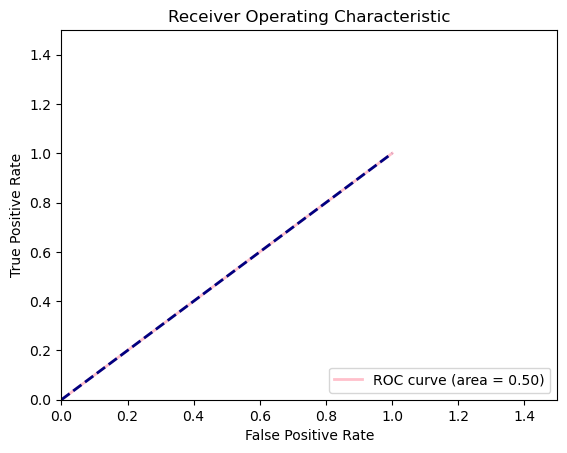

In [20]:

# ROC curve

y_train_prob = Baseline_model.predict_proba(X_train)[:, 1]  
falseP, trueP, _ = roc_curve(y_train, y_train_prob)
roc_auc = auc(falseP, trueP)

plt.figure()
plt.plot(falseP, trueP, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.5])
plt.ylim([0.0, 1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [21]:
# Defining Confusion Matrix and using the Pair_confusion_matrix library instead of Plot
def pair_confusion_matrix(Baseline_model, X_test, y_test, normalize=None, include_values=True, display_labels=None, cmap=plt.cm.RdGy):
    y_val = Baseline_model.predict(X_test)
    CM = confusion_matrix(y_test, y_val, normalize=normalize)
    CMdisp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=display_labels)
    CMdisp.plot(cmap=plt.cm.RdGy, include_values=include_values)
    plt.show()

In [22]:
# Evaluate the model

def evaluate(Baseline_model, X_train, y_train, X_test, y_test):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_train, Baseline_model.predict(X_train))}')
    print(f'Test - {accuracy_score(y_test, Baseline_model.predict(X_test))}')
    print('  ')
    print('Precision Score:')
    print(f'Train - {precision_score(y_train, Baseline_model.predict(X_train))}')
    print(f'Test - {precision_score(y_test, Baseline_model.predict(X_test))}')
    print('  ')
    print('Recall Score: ')
    print(f'Train - {recall_score(y_train, Baseline_model.predict(X_train))}')
    print(f'Test - {recall_score(y_test, Baseline_model.predict(X_test))}')
    print('  ')
    print('F1 Score: ')
    print(f'Train - {f1_score(y_train, Baseline_model.predict(X_train))}')
    print(f'Test - {f1_score(y_test, Baseline_model.predict(X_test))}')
    print('  ')
    print('ROC_AUC: ')
    print(f'Train - {roc_auc_score(y_train, Baseline_model.predict(X_train))}')
    print(f'Test - {roc_auc_score(y_test, Baseline_model.predict(X_test))}')
    print('  ')
    print('  ')
    print('Confusion matrix for test data')
    pair_confusion_matrix(Baseline_model, X_test, y_test, normalize='pred', include_values=True, display_labels=['Need Repair', 'Functional'], cmap=plt.cm.Blues)

Accuracy Score:
Train - 0.5430871212121212
Test - 0.5430345117845118
  
Precision Score:
Train - 0.5430871212121212
Test - 0.5430345117845118
  
Recall Score: 
Train - 1.0
Test - 1.0
  
F1 Score: 
Train - 0.7038969008898435
Test - 0.7038527105352881
  
ROC_AUC: 
Train - 0.5
Test - 0.5
  
  
Confusion matrix for test data


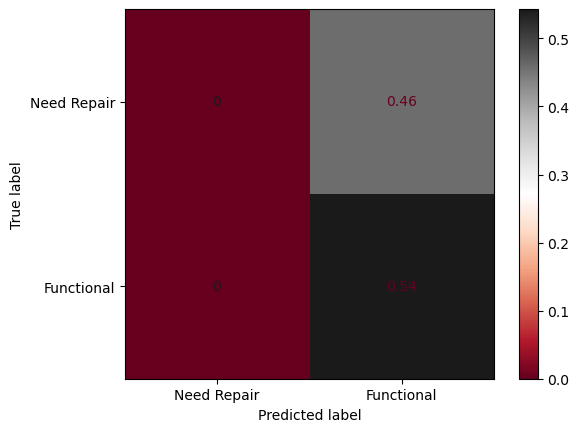

In [23]:
evaluate(Baseline_model, X_train, y_train, X_val, y_val)


From the result Trained data predicted a balance by stating  50% chance in 'Functional wells' and 50% distributed in  'Non functional & 'Functional but needs repair'  



# Decision Tree Model.

In [24]:
# Decision Tree PIPeline

DT_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=57))
])
# Fit the Decision Tree

DT_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'amount_tsh',
                                                   'gps_height', 'longitude',
                                                   'latitude'...
                                                  ['date_recorded', 'funder',
                                                   'installer', 'wpt_name',
                                                   'basin', 'subvillage',
                                                   'region', 'lga', 'ward',
                                                   'scheme_management',
                                                   'scheme_name',
                                                   'extraction_type',
                                                   'extraction_type_class',
                                                   'management',
                                                   'management_group',
                                                   'payment', 'water_quality',
                                                   'quality_group', 'quantity',
                                                   'source', 'source_class',
                                                   'waterpoint_type'])])),
                ('classifier', DecisionTreeClassifier(random_state=57))])

Precision score: 0.77
Accuracy score: 0.75
F1 score: 0.77
ROC_AUC_score: 0.75
Recall score: 0.77


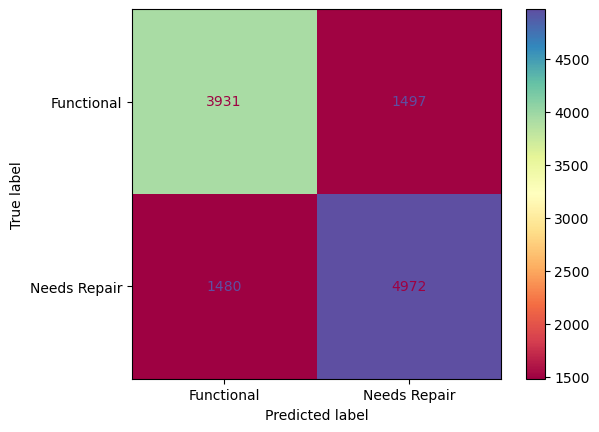

In [25]:

# Evaluate the model by Making predictions

y_val = DT_pipeline.predict(X_test)
y_val_prob = DT_pipeline.predict_proba(X_test)[:,1]

# metrics

precision = precision_score(y_test,y_val)
accuracy = accuracy_score(y_test,y_val)
f1 = f1_score(y_test,y_val)
roc_auc = roc_auc_score(y_test,y_val_prob)
recall = recall_score(y_test,y_val)

#Print the results

print(f'Precision score: {precision:.2f}')
print(f'Accuracy score: {accuracy:.2f}')
print(f'F1 score: {f1:.2f}')
print(f'ROC_AUC_score: {roc_auc:.2f}')
print(f'Recall score: {recall:.2f}')

# Confusion Matrix
 
Cm = confusion_matrix(y_test, y_val)
Cmdisp = ConfusionMatrixDisplay(confusion_matrix=Cm, display_labels=['Functional', 'Needs Repair'])
Cmdisp.plot(cmap=plt.cm.Spectral, include_values=True)
plt.show()


This is an Overfitted model.
Tune the model to enhance perfomance

# Increasing Model Perfomance

Accuracy Score:
Train - 0.5430871212121212
Test - 0.5430976430976431
  
Precision Score:
Train - 0.5430871212121212
Test - 0.5430976430976431
  
Recall Score: 
Train - 1.0
Test - 1.0
  
F1 Score: 
Train - 0.7038969008898435
Test - 0.7039057385991708
  
ROC_AUC: 
Train - 0.5
Test - 0.5


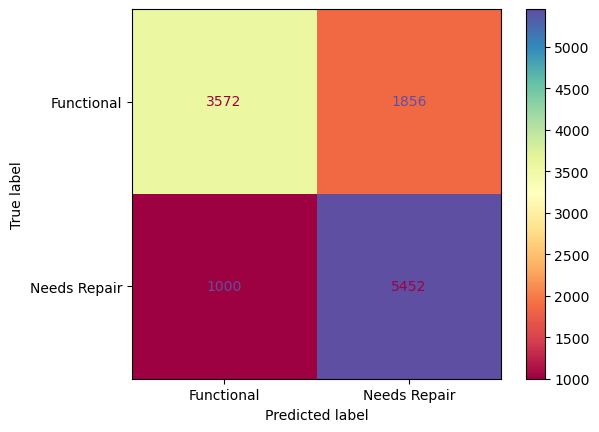

In [26]:
# Perfom Cross validation and Grid searches to make the Model have better performance.
# Use the same pipeline only add the new steps and a parameter grid for Decision Tree

param_grid = {
    'classifier__max_depth': [3,5,7,10],
    'classifier__min_samples_split': [2,5,10],
    'classifier__min_samples_leaf': [1,2,4]
}

# Decesion Tree Processor

DT_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=57))
])
# Grid search and fit on the train model and find the best estimator

Gridsearch = GridSearchCV(estimator=DT_pipeline, param_grid=param_grid, cv=5, scoring='accuracy' )
Gridsearch.fit(X_train,y_train)
BestEstimator = Gridsearch.best_estimator_

# Evaluate the best Model

y_val = BestEstimator.predict(X_test)
y_val_prob = BestEstimator.predict(X_test)

# Metrics

print('Accuracy Score:')
print(f'Train - {accuracy_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {accuracy_score(y_test, Baseline_model.predict(X_test))}')
print('  ')
print('Precision Score:')
print(f'Train - {precision_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {precision_score(y_test, Baseline_model.predict(X_test))}')
print('  ')
print('Recall Score: ')
print(f'Train - {recall_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {recall_score(y_test, Baseline_model.predict(X_test))}')
print('  ')
print('F1 Score: ')
print(f'Train - {f1_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {f1_score(y_test, Baseline_model.predict(X_test))}')
print('  ')
print('ROC_AUC: ')
print(f'Train - {roc_auc_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {roc_auc_score(y_test, Baseline_model.predict(X_test))}')

CM = confusion_matrix(y_test, y_val)
CMdisp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels= ['Functional', 'Needs Repair'])
CMdisp.plot(cmap=plt.cm.Spectral, include_values=True)
plt.show()

After trying to better the model we can see that results of of the Test and Train results are almost identical only that the test results are greater by .0001.. which shows the first model which was [Test-only] results  had many instances  of Random chance.

This is a Good performing model.

# Logistic Regression Model.

Accuracy: 0.66
Precision: 0.67
Recall: 0.73
F1 score: 0.70
ROC AUC: 0.65


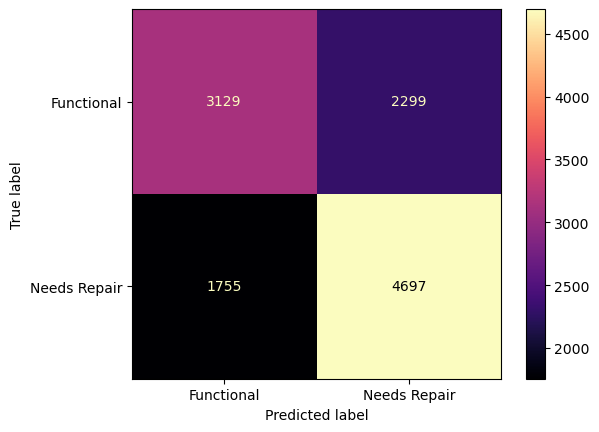

In [27]:
# Same steps carried out for pipeline in Decesion tree.
# Prameter grid
param_grid = {
    'classifier__C' : [0.01,0.1,1,10,100],
    'classifier__solver' : ['liblineaer', 'saga']
} 

# set up pipeline

Linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=57, max_iter= 2000))
])
Linear_pipeline.fit(X_train,y_train)
# Evaluate the model

y_val = Linear_pipeline.predict(X_test)
y_val_prob = Linear_pipeline.predict(X_val)

accuracy = accuracy_score(y_test,y_val)
f1 = f1_score(y_test,y_val)
roc_auc = roc_auc_score(y_test,y_val)
recall = recall_score(y_test,y_val)
precision = precision_score(y_test,y_val)

# print results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


#  Define and plot the confusion matrix
CM = confusion_matrix(y_test,y_val)
CMdisp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['Functional', 'Needs Repair'])
CMdisp.plot(cmap=plt.cm.magma, include_values=True)
plt.show()

 The Model has a fairly significant number of False Positives and False Negatives, hence the model could be struggling with both Overfitting and Underfitting.

# Refining the model



c:\Users\HP\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\envs\learn-env\Lib\site-pack

Accuracy Score:
Train - 0.5430871212121212
Test - 0.5430976430976431
  
Precision Score:
Train - 0.5430871212121212
Test - 0.5430976430976431
  
Recall Score: 
Train - 1.0
Test - 1.0
  
F1 Score: 
Train - 0.7038969008898435
Test - 0.7039057385991708
  
ROC_AUC: 
Train - 0.5
Test - 0.5


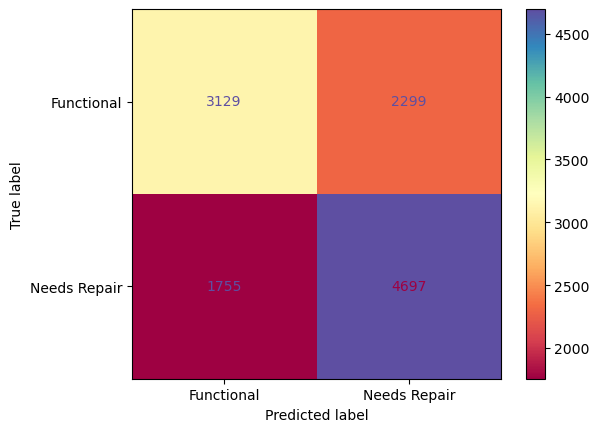

In [28]:
# Adding Grid search and cross-validation
param_grid = {
    'classifier__C' : [0.01,0.1,1,10,100],
    'classifier__solver' : ['liblineaer', 'saga']
} 

# set up pipeline

Linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=57, max_iter= 2000))
])
Linear_pipeline.fit(X_train,y_train)

# Grid search and fit.

Gridsearch = GridSearchCV(estimator=Linear_pipeline, 
                          param_grid=param_grid, 
                          cv=5, scoring='accuracy')

Gridsearch.fit(X_train,y_train)

# Estimator

BestEstimator = Gridsearch.best_estimator_

# Evaluate the model

y_val = Linear_pipeline.predict(X_test)
y_val_prob = Linear_pipeline.predict(X_test)

accuracy = accuracy_score(y_test,y_val)
precision = precision_score(y_test,y_val)
recall = recall_score(y_test,y_val)
f1 = f1_score(y_test,y_val)
roc_auc = roc_auc_score(y_test,y_val)

# print results

print('Accuracy Score:')
print(f'Train - {accuracy_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {accuracy_score(y_test, Baseline_model.predict(X_test))}')
print('  ')
print('Precision Score:')
print(f'Train - {precision_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {precision_score(y_test, Baseline_model.predict(X_test))}')
print('  ')
print('Recall Score: ')
print(f'Train - {recall_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {recall_score(y_test, Baseline_model.predict(X_test))}')
print('  ')
print('F1 Score: ')
print(f'Train - {f1_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {f1_score(y_test, Baseline_model.predict(X_test))}')
print('  ')
print('ROC_AUC: ')
print(f'Train - {roc_auc_score(y_train, Baseline_model.predict(X_train))}')
print(f'Test - {roc_auc_score(y_test, Baseline_model.predict(X_test))}')

CM = confusion_matrix(y_test, y_val)
CMdisp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels= ['Functional', 'Needs Repair'])
CMdisp.plot(cmap=plt.cm.Spectral, include_values=True)
plt.show()


From The Output it is evident that the Logistic Regression does not converge and therefore is a struggling model when it comes to big data compared  to the Decesion Tree Model,  and therefore is not considered suitable for the nature of this Data.

The Decesion Tree Model has proven to be far much efficient than the Logistic Regression hence I choose it for my final Model.

# Final Model Deployement.


In [46]:
# Load the Test Data

X_Test = pd.read_csv('Testsetvalues.csv.', index_col=None )
X_Test.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [41]:
print(X_Test.columns)
X_Test.info

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')


<bound method DataFrame.info of        amount_tsh date_recorded                  funder  gps_height  \
id                                                                    
50785         0.0    2013-02-04                    Dmdd        1996   
51630         0.0    2013-02-04  Government Of Tanzania        1569   
17168         0.0    2013-02-01                     NaN        1567   
45559         0.0    2013-01-22              Finn Water         267   
49871       500.0    2013-03-27                  Bruder        1260   
...           ...           ...                     ...         ...   
39307         0.0    2011-02-24                  Danida          34   
18990      1000.0    2011-03-21                    Hiap           0   
28749         0.0    2013-03-04                     NaN        1476   
33492         0.0    2013-02-18                 Germany         998   
68707         0.0    2013-02-13  Government Of Tanzania         481   

        installer  longitude   latitude     

In [42]:
# Columns to drop

Dropcolumns = ['source_type', 
               'payment_type', 
               'quantity_group',
]
# drop irrelevant columns

X_Test = X_Test.drop(Dropcolumns, axis=1)

In [43]:
X_Test.isnull()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,management,management_group,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
50785,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51630,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17168,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49871,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28749,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
print(X_Test.columns)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


In [85]:
# map 1s and 0s 'funtional' and 'need repair'
Functonality_map = {1:'Functional', 0:'Need Repair'}
X_Test['Status']=X_Test['Status'].map(Functonality_map)

In [86]:
DT_pipeline.fit(X_train,y_train)
# predict  status using final model
Prediction =DT_pipeline.predict(X_Test)
# add predictions to dataframe
X_Test['Status'] = Prediction
# plot predictions on map
# Define color map
color_map = {'Functonal': 'Blue', 'Need Repair': 'Red' }

fig = px.scatter_mapbox(X_Test,
                       lat='latitude',
                       lon='longitude',
                       color='Status',
                       color_discrete_map=color_map) 
fig.update_layout(mapbox_style='open-street-map')
fig.show()

The Blue points on the map are predicted as 'Functional while the Yellow points are predicted as 'Need repair'.

# Conclusions and Recommendations
 
 - Decesion Tree is the most suitable for modeling this kind of data as compared to Logistic Regression model
 - Decesion Tree gives accurate results depending on Paramaters of Tuning used.
- From the Predictions we can get the precise location of the broken pumps by use of Longitude and Latitudes which is highly accurate.

1. I would reccomend the use of Non Submisible Pumps as they tend to break down faster.
2. Renew Pumps that have been active for a long time
3. Fix any Problem as soon as it arises.

I would Highly recommend my model for to the Government of Tanzania as it is very precise in Locating The Pumps and their Status.